Pasos:
1. Importar información de precios.
2. Calcular rendimientos diarios:
Rendimiento diario promedio.
Varianza y volatilidad de los activos.
3. Calcular matriz de varianzas y covarianzas.
4. Crear portafolio eficiente A
5. Crear portafolio eficiente B
6. Crear portafolio eficiente C combinando portafolios A y B: modificando las proporciones elaborar la curva.
7. Obtener el portafolio de mínima varianza.
8. Encontrar el portafolio con la máxima RS.
9. Trazar la CML.

In [1]:
import pandas_datareader.data as web
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
start = dt.datetime(2010,1,1)
end = dt.datetime.now()

tickers = ["AAPL","MSFT","GOOG","F","MS"]

df = pd.DataFrame()
for ticker in tickers:
  df2 = web.DataReader(ticker, "yahoo", start, end)
  df[ticker]=df2["Adj Close"]

df.tail()

,AAPL,MSFT,GOOG,F,MS
Date,,,,,
2021-04-14,132.029999,255.589996,2254.840088,12.24,80.790001
2021-04-15,134.500000,259.500000,2296.659912,12.24,80.820000
2021-04-16,134.160004,260.739990,2297.760010,12.23,78.589996
2021-04-19,134.839996,258.739990,2302.399902,12.11,80.029999
2021-04-20,133.110001,258.260010,2293.629883,11.45,77.290001


In [3]:
R = np.log(df/df.shift(1))
R.dropna(inplace=True)
R.describe()
Er = np.array(R.describe().loc["mean"])
std = np.array(R.describe().loc["std"])
var = std**2
varcovar = R.cov()

In [4]:
#Portafolio eficiente A

c1 = 0 
weight_A = np.linalg.inv(varcovar) @ (Er - c1) / np.sum(np.linalg.inv(varcovar) @ (Er - c1))
Er_A = weight_A @ Er
var_A = weight_A @ varcovar @ weight_A.T
std_A = np.sqrt(var_A)

In [5]:
#Portafolio eficiente B

c2 = 0.04 
weight_B = np.linalg.inv(varcovar) @ (Er - c2) / np.sum(np.linalg.inv(varcovar) @ (Er - c2))
Er_B = weight_B @ Er
var_B = weight_B @ varcovar @ weight_B.T
std_B = np.sqrt(var_B)

In [6]:
covAB = weight_A @ varcovar @ weight_B.T

In [7]:
w_A = np.linspace(-1.5,4.5,num=100)

w_B = 1 - w_A

Er_C = w_A * Er_A + w_B * Er_B
std_C = np.sqrt((w_A * std_A)**2 + (w_B * std_B)**2 + 2*w_A*w_B*covAB)

In [8]:
#Portafolio de mínima var

C = np.ones((varcovar.shape[0]))

PMV = C @ np.linalg.inv(varcovar) / (C @ np.linalg.inv(varcovar) @ C.T)

Er_PMV = PMV @ Er
std_PMV = np.sqrt(PMV @ varcovar @ PMV.T)

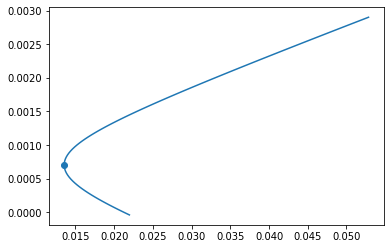

In [9]:
plt.plot(std_C, Er_C)
plt.scatter(std_PMV, Er_PMV)
plt.show()